# Bike-Sharing - Group B
**STATISTICAL PROGRAMMING - PYTHON**

## Instructions

Predict the total number of Washington D.C. bicycle users on an hourly basis.


(Use attached hour.csv)


Task description:


  * Training data: whole 2011 and first 3 quarters of 2012.
  * Test data: 4th quarter of 2012.  Do not use it to fit your models!
  * Target: total number of users (cnt)
  * Error metric: R2 score (scikit-learn's default for regression).
  * Features to use: at least the ones present in the data (except for cnt, casual, and registered).



# Load Data

In [1]:
import pandas as pd
import numpy as np

Information about the variables of the dataset:

	- instant: record index
	- dteday : date
	- hr : hour (0 to 23)
	- weathersit : Weather situation
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [2]:
df = pd.read_csv('hour.csv', index_col = 'instant', parse_dates=["dteday"], dayfirst = True)

We load the full dataset inside the df dataframe. We selected the 'instant' column as index given that it identifies in an unique way each row. Finally, we parsed the 'dteday' column to date directly during the data loading phase, in order to use this column as date in the EDA. We needed to put the argument 'dayfirst' equal to true because otherwise the automatic parsing of the function read_csv parsed wrongly some dates inverting the month and date fields.

In [3]:
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 10)

This dataframe contains 10 columns and 17379 rows, containing weather information as well as data about the usage of bike sharing service in Washington DC for years 2011 and 2012. The information on the time dimension is with a date and hour detail.

# Exploratory Data Analysis

* https://www.kite.com/blog/python/data-analysis-visualization-python/
* https://towardsdatascience.com/better-faster-stronger-python-exploratory-data-analysis-eda-e2a733890a64
* https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
* https://colab.research.google.com/github/hugobowne/COVID-19-EDA-tutorial/blob/master/notebooks/1-COVID-19-EDA-solution.ipynb

## Ensuring data quality

In [5]:
#!pip install pandas-profiling

Pandas Profiling to automatically create report with distribution of variables and correlations

In [ ]:
 #from pandas_profiling import ProfileReport
 #report = ProfileReport(df, minimal=False)
 #report

In [7]:
# !pip install sweetviz

Sweet Viz to automatically create report with distribution of variables and correlations

In [8]:
# import sweetviz as sv
# sweetviz_report = sv.analyze([df,'data'],target_feat='cnt')
# sweetviz_report.show_html('viz.html')

In [9]:
df.isna().sum()

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

We can see that 5 columns ('weathersit', 'temp', 'atemp', 'hum', 'windspeed') are affected by null values, so we will need some imputation strategies in the Data Engineering phase to deal with this missing data. 

Let's take a sample of the NAs of the variuos variables interested.

In [10]:
df.loc[df['weathersit'].isna()].head(10)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
329,2011-01-15,4,NaN,0.16,0.2273,0.59,0.0000,0,5,5
957,2011-02-12,11,NaN,0.30,0.2727,0.28,0.3284,30,84,114
1053,2011-02-16,14,NaN,0.46,0.4545,0.28,0.4179,17,65,82
1102,2011-02-18,15,NaN,0.66,0.6212,0.36,0.3284,55,117,172
1303,2011-02-27,11,NaN,0.36,0.3485,0.62,0.1343,33,92,125
1824,2011-03-21,17,NaN,0.54,0.5152,0.64,0.2537,41,231,272
2142,2011-04-04,2,NaN,0.38,0.3939,0.66,0.2537,1,1,2
2161,2011-04-04,21,NaN,0.70,0.6364,0.30,0.4478,19,76,95
2256,2011-04-08,20,NaN,0.30,0.2727,0.93,0.3284,12,51,63


In [11]:
df.loc[df['temp'].isna()].head(10)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
56,2011-01-03,10,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.1667,0.43,0.2537,11,33,44
134,2011-01-06,19,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.2576,0.55,0.0896,3,109,112
280,2011-01-13,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.1212,0.50,0.3582,0,2,2
621,2011-01-29,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.2273,0.64,0.1642,0,15,15
851,2011-02-07,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.3485,0.70,0.0000,3,75,78
915,2011-02-10,15,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.1970,0.25,0.2537,0,50,50
1286,2011-02-26,17,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.3485,0.43,0.2239,53,130,183
1671,2011-03-15,5,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,0.2273,0.75,0.1940,0,11,11
1689,2011-03-15,23,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",NaN,0.3182,0.87,0.1642,1,17,18


In [12]:
df.loc[df['atemp'].isna()].head(10)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
354,2011-01-16,5,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,NaN,0.56,0.1642,1,1,2
748,2011-02-03,13,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.20,NaN,0.40,0.4179,4,47,51
981,2011-02-13,12,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.36,NaN,0.32,0.4627,58,94,152
1550,2011-03-09,22,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.32,NaN,0.93,0.1642,4,17,21
1579,2011-03-11,6,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,NaN,0.81,0.2836,1,31,32
1803,2011-03-20,19,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.36,NaN,0.43,0.2836,21,58,79
1811,2011-03-21,3,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.34,NaN,0.71,0.3284,0,1,1
1895,2011-03-24,17,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.30,NaN,0.70,0.2239,12,221,233
2261,2011-04-09,1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.30,NaN,0.87,0.1343,3,17,20


In [13]:
df.loc[df['hum'].isna()].head(10)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
251,2011-01-11,19,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.16,0.2273,NaN,0.0000,0,51,51
287,2011-01-13,9,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.14,0.1212,NaN,0.3284,2,137,139
386,2011-01-17,13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.18,0.1970,NaN,0.1343,13,80,93
500,2011-01-22,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.06,0.1061,NaN,0.0896,0,39,39
525,2011-01-23,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.06,0.0606,NaN,0.2239,4,17,21
624,2011-01-29,6,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.16,0.1818,NaN,0.1343,0,2,2
822,2011-02-06,16,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.34,0.3485,NaN,0.1045,42,115,157
1239,2011-02-24,17,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.36,0.3485,NaN,0.1940,9,168,177
1285,2011-02-26,16,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.36,0.3333,NaN,0.2836,41,130,171


In [14]:
df.loc[df['windspeed'].isna()].head(10)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
55,2011-01-03,9,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.16,0.1364,0.43,NaN,7,81,88
278,2011-01-13,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.14,0.1212,0.59,NaN,1,6,7
535,2011-01-24,10,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.10,0.1364,0.42,NaN,6,34,40
547,2011-01-24,22,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.14,0.1364,0.63,NaN,3,32,35
1017,2011-02-15,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.30,0.2727,0.49,NaN,7,12,19
1055,2011-02-16,16,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.46,0.4545,0.31,NaN,26,96,122
1278,2011-02-26,9,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.56,NaN,9,65,74
2072,2011-04-01,4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.24,0.2273,0.93,NaN,0,3,3
2235,2011-04-07,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.38,0.3939,0.76,NaN,9,45,54


Here we can see the data values of the different columns present in the original dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   hr          17379 non-null  int64         
 2   weathersit  17279 non-null  object        
 3   temp        17280 non-null  float64       
 4   atemp       17279 non-null  float64       
 5   hum         17279 non-null  float64       
 6   windspeed   17279 non-null  float64       
 7   casual      17379 non-null  int64         
 8   registered  17379 non-null  int64         
 9   cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 1.5+ MB


In [16]:
df.shape

(17379, 10)

In [17]:
df.describe()

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17280.000000,17279.000000,17279.000000,17279.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.497071,0.475530,0.627235,0.190114,35.676218,153.786869,189.463088
std,6.914405,0.192474,0.171782,0.193047,0.122378,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Check that the parse of the date is right! (Problem month/day)

In [6]:
df.index.is_monotonic

True

In [7]:
df['dteday'].is_monotonic

True

In [20]:
df['dteday'].head(30)

instant
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
5    2011-01-01
6    2011-01-01
7    2011-01-01
8    2011-01-01
9    2011-01-01
10   2011-01-01
11   2011-01-01
12   2011-01-01
13   2011-01-01
14   2011-01-01
15   2011-01-01
16   2011-01-01
17   2011-01-01
18   2011-01-01
19   2011-01-01
20   2011-01-01
21   2011-01-01
22   2011-01-01
23   2011-01-01
24   2011-01-01
25   2011-01-02
26   2011-01-02
27   2011-01-02
28   2011-01-02
29   2011-01-02
30   2011-01-02
Name: dteday, dtype: datetime64[ns]

The date is parsed correctly.

## Plotting clear and meaningful figures

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In this section, we are going to plot the data in order to find meaningful insights. We divide the analysis in two types of plots:
   * Normal plots: understand the relationship between the variables which are not time related
   * Time Series plots: understand how the various variables behave in relation to time

In order to plot the relationship between the various variables, we took 2 approaches:
   * Manual plotting
   * Interactive plotting

### Normal Plots

#### Manual Plotting

Plot the relationships between the various explanatory variables.

Text(0.5, 1.05, 'Relationship Humidity - Temperature')

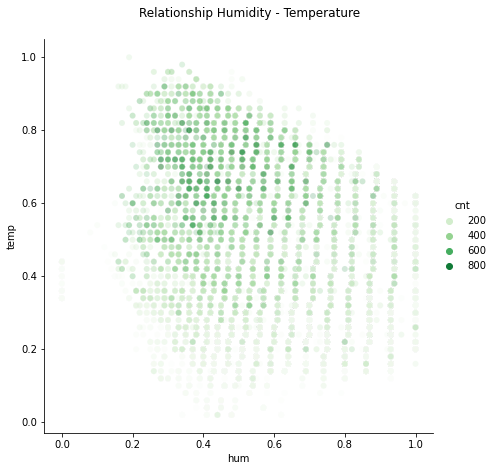

In [22]:
sns.relplot(x='hum',
            y='temp',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
            hue='cnt',
            palette='Greens'
           ).fig.suptitle('Relationship Humidity - Temperature', y=1.05)

Text(0.5, 1.05, 'Relationship Humidity - Perceived Temperature')

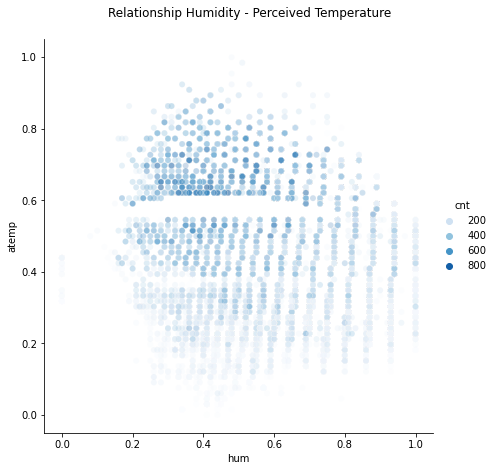

In [23]:
sns.relplot(x='hum',
            y='atemp',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
            hue="cnt",
            palette="Blues"
           ).fig.suptitle('Relationship Humidity - Perceived Temperature', y=1.05)

Text(0.5, 1.05, 'Relationship Humidity - Wind Speed')

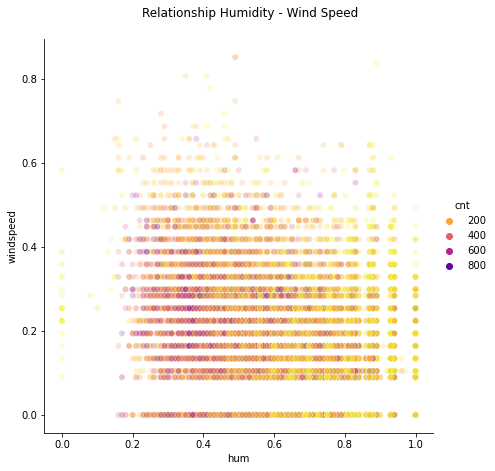

In [24]:
sns.relplot(x='hum',
            y='windspeed',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
            hue="cnt",
            palette="plasma_r"
           ).fig.suptitle('Relationship Humidity - Wind Speed', y=1.05)

Text(0.5, 1.05, 'Relationship Hour - Temperature')

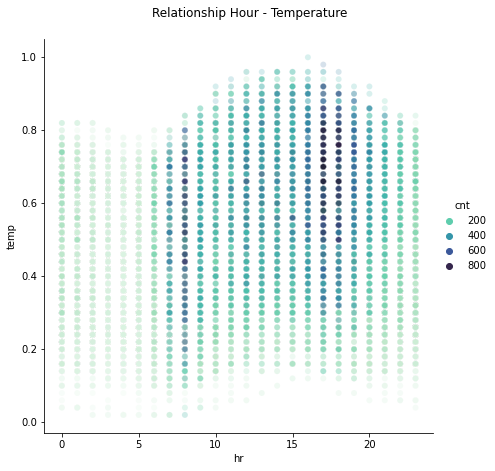

In [25]:
sns.relplot(x='hr',
            y='temp',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
            hue="cnt",
            palette="mako_r"
           ).fig.suptitle('Relationship Hour - Temperature', y=1.05)

Text(0.5, 1.05, 'Relationship Hour - Humidity')

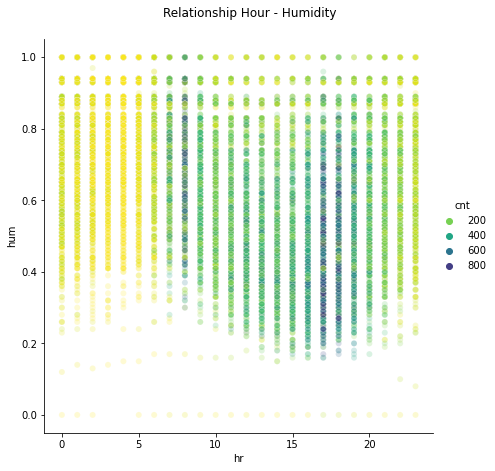

In [26]:
sns.relplot(x='hr',
            y='hum',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
            hue="cnt",
            palette="viridis_r"
           ).fig.suptitle('Relationship Hour - Humidity', y=1.05)

Text(0.5, 1.05, 'Relationship Hour - Wind Speed')

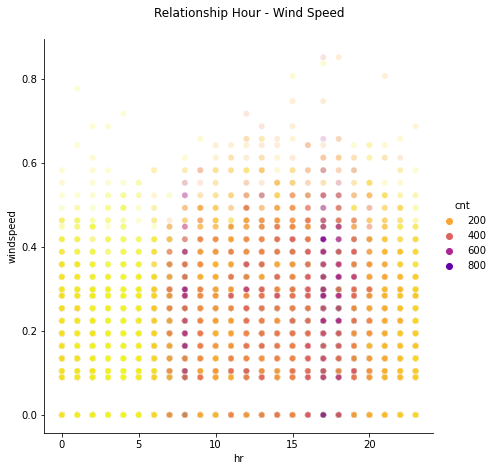

In [27]:
sns.relplot(x='hr',
            y='windspeed',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
            hue="cnt",
            palette="plasma_r"
           ).fig.suptitle('Relationship Hour - Wind Speed', y=1.05)

Plotting scatterplot between explanatory variables and target variable to understand possible relations.

Text(0.5, 1.05, 'Correlation between Humidity and Count')

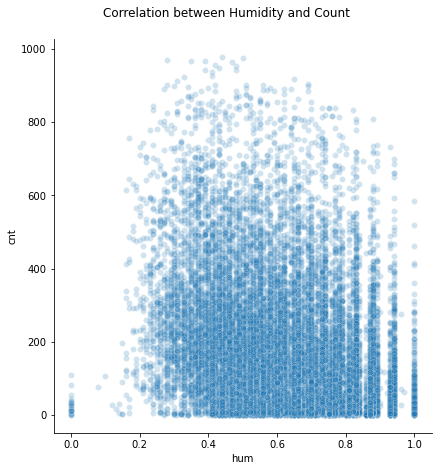

In [28]:
sns.relplot(x='hum',
            y='cnt',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df,
           ).fig.suptitle('Correlation between Humidity and Count', y=1.05)

Text(0.5, 1.05, 'Correlation between Temperature and Count')

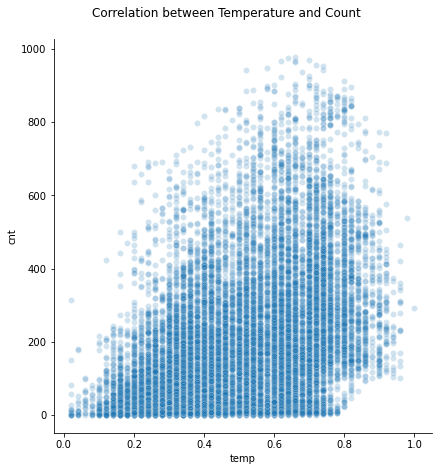

In [29]:
sns.relplot(x='temp',
            y='cnt',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df
           ).fig.suptitle('Correlation between Temperature and Count', y=1.05)

Text(0.5, 1.05, 'Correlation between Perceived Temperature and Count')

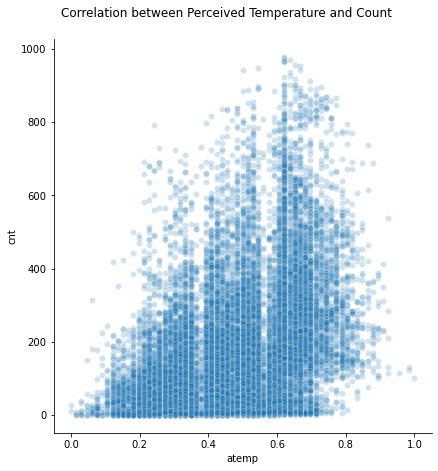

In [30]:
sns.relplot(x='atemp',
            y='cnt',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df
           ).fig.suptitle('Correlation between Perceived Temperature and Count', y=1.05)

Text(0.5, 1.05, 'Correlation between Wind Speed and Count')

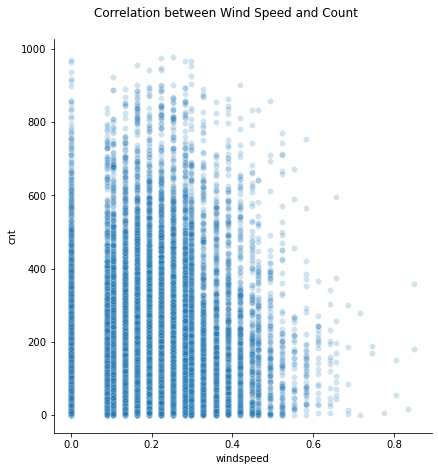

In [31]:
sns.relplot(x='windspeed',
            y='cnt',
            kind='scatter',
            alpha=0.2,
            height=6,
            aspect=1,
            data=df
           ).fig.suptitle('Correlation between Wind Speed and Count', y=1.05)

#### Interactive Plot

In [53]:
#!pip install plotly

In [54]:
#!pip install cufflinks

In [9]:
import cufflinks as cf

In [10]:
import ipywidgets
from ipywidgets import interact, interact_manual, widgets

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [11]:
@interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 colorscale=list(cf.colors._scales_names.keys())):
    
    plt.figure(figsize=(10,10))
    sns.relplot(x=x, y=y, kind='scatter', alpha=0.2, height=6, aspect=1, data=df, palette=colorscale
               ).fig.suptitle('Plotting df features', y=1.05)
    

interactive(children=(Dropdown(description='x', options=('hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', …

### Time Series Plots

In this section, we are going create some meaningful plots to undertand the relation between time variables (dteday and hr) and the target variable (cnt).

Here we are creating 2 dataframes that mean of the numerical variables of our dataset, grouped by date (df_gb_day) and hour (df_gb_hour). We will use this data later to create some plots

In [12]:
df_gb_day = df.groupby(['dteday'])[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].mean()

In [13]:
df_gb_hr = df.groupby(['hr'])[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].mean()

In [14]:
df_gb_day.head()

,temp,atemp,hum,windspeed,cnt
dteday,,,,,
2011-01-01,0.344167,0.363625,0.805833,0.160446,41.041667
2011-01-02,0.363478,0.353739,0.696087,0.248539,34.826087
2011-01-03,0.197143,0.189405,0.437273,0.241652,61.318182
2011-01-04,0.200000,0.212122,0.590435,0.160296,67.913043
2011-01-05,0.226957,0.229270,0.436957,0.186900,69.565217


In [15]:
df_gb_hr.head()

,temp,atemp,hum,windspeed,cnt
hr,,,,,
0,0.467389,0.451284,0.691080,0.161100,53.898072
1,0.459362,0.442969,0.704081,0.158458,33.375691
2,0.455882,0.439290,0.716419,0.154422,22.869930
3,0.452835,0.437953,0.729583,0.150893,11.727403
4,0.446446,0.432498,0.742284,0.155737,6.352941


#### Manual Plots

Time series plots between the day and the mean of other variables, grouped by the day itself.

Text(0.5, 1.0, 'Temperature by Day')

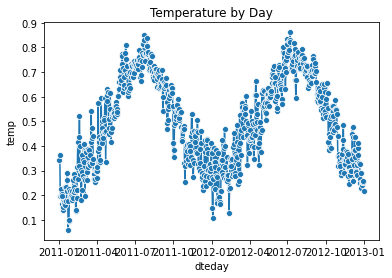

In [16]:
sns.lineplot(x=df_gb_day.index, y='temp', data=df_gb_day, marker='o').set_title('Temperature by Day') # Specify markers with marker argument

Text(0.5, 1.0, 'Perceived Temperature by Day')

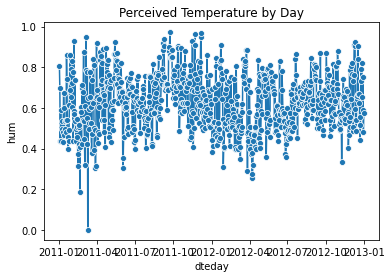

In [42]:
sns.lineplot(x=df_gb_day.index, y='hum', data=df_gb_day, marker='o').set_title('Perceived Temperature by Day') # Specify markers with marker argument

Text(0.5, 1.0, 'Wind Speed by Day')

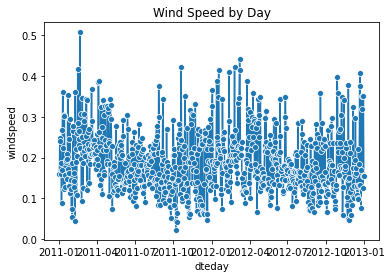

In [43]:
sns.lineplot(x=df_gb_day.index, y='windspeed', data=df_gb_day, marker='o').set_title('Wind Speed by Day') # Specify markers with marker argument

Text(0.5, 1.0, 'Temperature by Hour')

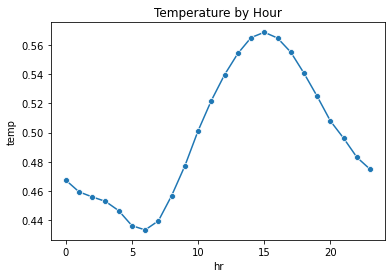

In [44]:
sns.lineplot(x=df_gb_hr.index, y='temp', data=df_gb_hr, marker='o').set_title('Temperature by Hour') # Specify markers with marker argument

Text(0.5, 1.0, 'Perceived Temperature by Hour')

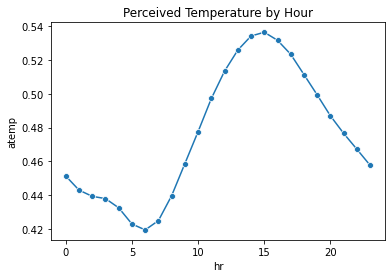

In [45]:
sns.lineplot(x=df_gb_hr.index, y='atemp', data=df_gb_hr, marker='o').set_title('Perceived Temperature by Hour') # Specify markers with marker argument

Text(0.5, 1.0, 'Humidity by Hour')

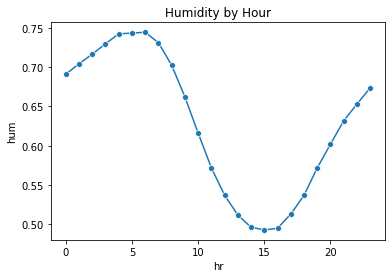

In [46]:
sns.lineplot(x=df_gb_hr.index, y='hum', data=df_gb_hr, marker='o').set_title('Humidity by Hour') # Specify markers with marker argument

Text(0.5, 1.0, 'Wind Speed by Hour')

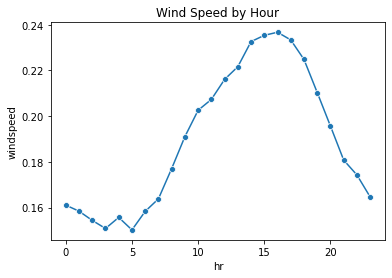

In [47]:
sns.lineplot(x=df_gb_hr.index, y='windspeed', data=df_gb_hr, marker='o').set_title('Wind Speed by Hour') # Specify markers with marker argument

Text(0.5, 1.0, 'Count by Day')

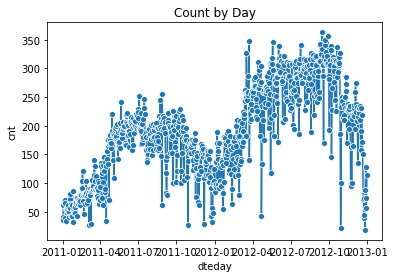

In [48]:
sns.lineplot(x=df_gb_day.index, y='cnt', data=df_gb_day, marker='o').set_title('Count by Day') # Specify markers with marker argument

Text(0.5, 1.0, 'Count by Hour')

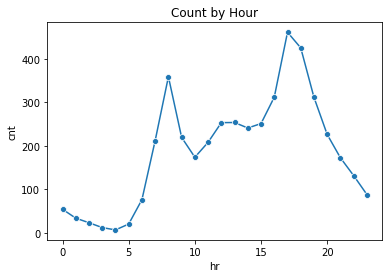

In [49]:
sns.lineplot(x=df_gb_hr.index, y='cnt', data=df_gb_hr, marker='o').set_title('Count by Hour') # Specify markers with marker argument

In these plots, we are plotting the boxplot of the different numerical variables, to check the presence or not of outliers.

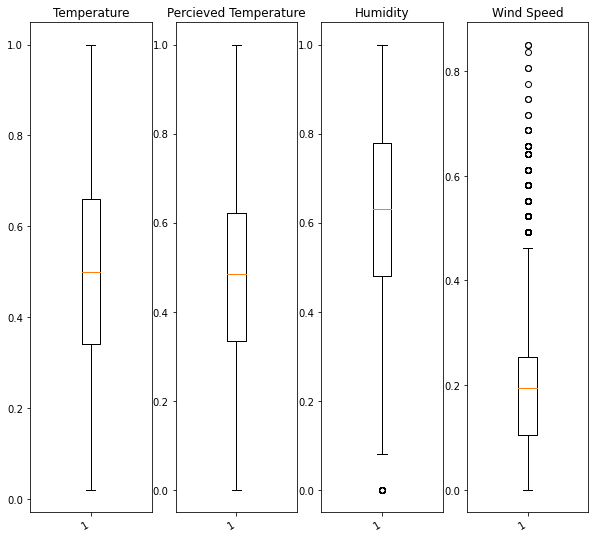

In [17]:
fig, axes = plt.subplots(ncols = 4, figsize = (10, 10))

axes[0].boxplot(df['temp'].dropna())
axes[1].boxplot(df['atemp'].dropna())
axes[2].boxplot(df['hum'].dropna())
axes[3].boxplot(df['windspeed'].dropna())

axes[0].set_title("Temperature")
axes[1].set_title("Percieved Temperature")
axes[2].set_title("Humidity")
axes[3].set_title("Wind Speed")

fig.autofmt_xdate()

#### Interactive Plots

Iterative plot for the data, grouped by: day, hr

In [18]:
# Group by day

@interact_manual
def scatter_plot(y=list(df_gb_day.select_dtypes('number').columns)[0:],
                 colorscale=list(cf.colors._scales_names.keys())):
    plt.figure(figsize=(10,10))
    sns.lineplot(x=df_gb_day.index, y=y, data=df_gb_day, marker='o').set_title('Variables by Day') # Specify markers with marker argument
    

interactive(children=(Dropdown(description='y', options=('temp', 'atemp', 'hum', 'windspeed', 'cnt'), value='t…

In [20]:
df_gb_hr.head()

,temp,atemp,hum,windspeed,cnt
hr,,,,,
0,0.467389,0.451284,0.691080,0.161100,53.898072
1,0.459362,0.442969,0.704081,0.158458,33.375691
2,0.455882,0.439290,0.716419,0.154422,22.869930
3,0.452835,0.437953,0.729583,0.150893,11.727403
4,0.446446,0.432498,0.742284,0.155737,6.352941


In [22]:
# Group by hr

@interact_manual
def scatter_plot(y=list(df.select_dtypes('number').columns)[1:],
                 colorscale=list(cf.colors._scales_names.keys())):
    plt.figure(figsize=(10,10))
    sns.lineplot(x=df_gb_hr.index, y=y, data=df_gb_hr, marker='o').set_title('Variables by Hour') # Specify markers with marker argument
    

interactive(children=(Dropdown(description='y', options=('temp', 'atemp', 'hum', 'windspeed', 'casual', 'regis…

# Data Engineering

* https://scikit-learn.org/stable/modules/preprocessing.html
* https://scikit-learn.org/stable/data_transforms.html
* https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/
* https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
* https://www.kaggle.com/learn/feature-engineering
* https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96

Create a working copy of the original df to preserve it

In [23]:
df_work = df.copy()

## Use of different Imputation techniques to deal with NAs

How to input missing values and outliers, how to define an outliers, methods to input NAs (SimpleImputer, IterativeImputer..., mean, median...)

In [24]:
def split_df(dataframe):
    
    X = dataframe.loc[:, dataframe.columns != 'cnt']
    y = dataframe['cnt']

    return X, y

In this section, we are going to deal with missing values in different ways. Later, we will include all these transformations in pipelines.

**Approach 1: Drop all the null values**

Here we drop the NAs in all the columns of our dataset.

In [25]:
df_no_na = df_work.dropna()

Here we drop the columns 'casual' and 'registered', given that they will not be used in the analysis.

In [26]:
df_no_na = df_no_na.drop(columns = ['casual', 'registered'])

Here we split the dataset from explanatory and target variable.

In [27]:
X_no_na, y_no_na = split_df(df_no_na)

In [28]:
X_no_na.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0


In [29]:
y_no_na.head()

instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

**Approach 2: Impute missing values with median (SimpleImputer)**

In [30]:
from sklearn.impute import SimpleImputer

Here we drop the columns 'casual' and 'registered', given that they will not be used in the analysis.

In [31]:
df_simpl_imp = df_work.drop(columns = ['casual', 'registered'])

Here we split the dataset from explanatory and target variable.

In [32]:
X_simpl_imp, y_simpl_imp = split_df(df_simpl_imp)

We select only the numerical variables in order to use them into the SimpleImputer.

In [33]:
X_simpl_imp_num = X_simpl_imp.select_dtypes(include=np.number).drop(columns = 'hr')

In [34]:
X_simpl_imp_num.head()

,temp,atemp,hum,windspeed
instant,,,,
1,0.24,0.2879,0.81,0.0
2,0.22,0.2727,0.80,0.0
3,0.22,0.2727,0.80,0.0
4,0.24,0.2879,0.75,0.0
5,0.24,0.2879,0.75,0.0


Here we define the SimpleImputer that will input the median value of the variable to fill the NAs.

In [35]:
imp = SimpleImputer(strategy="median")
imp

SimpleImputer(strategy='median')

In [36]:
Xt = imp.fit_transform(X_simpl_imp_num)
#Xt

In [37]:
Xt = pd.DataFrame(Xt, columns = X_simpl_imp_num.columns)
#Xt

Here we select only the categorical variables to input the missing values with the 'most frequent value' strategy.

In [38]:
X_cat = X_simpl_imp.select_dtypes(include=np.object)
#X_cat

In [39]:
imp_cat = SimpleImputer(strategy= 'most_frequent')
imp

SimpleImputer(strategy='median')

In [40]:
Xt_cat = imp_cat.fit_transform(X_cat)
#Xt_cat

In [41]:
Xt_cat = pd.DataFrame(Xt_cat, columns = X_cat.columns)
#Xt_cat

In [42]:
X_simpl_imp_fin = pd.concat([Xt, Xt_cat], axis = 1)
X_simpl_imp_fin

,temp,atemp,hum,windspeed,weathersit
0,0.24,0.2879,0.81,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,0.22,0.2727,0.80,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,0.22,0.2727,0.80,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,0.24,0.2879,0.75,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,0.24,0.2879,0.75,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17375,0.26,0.2576,0.60,0.1642,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,0.26,0.2576,0.60,0.1642,"Clear, Few clouds, Partly cloudy, Partly cloudy"
17377,0.26,0.2727,0.56,0.1343,"Clear, Few clouds, Partly cloudy, Partly cloudy"


**Approach 3: Impute missing values with IterativeImputer in numerical variables, impute with SimpleImputer in categorical**

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [44]:
df_iter_imp = df_work.drop(columns = ['casual', 'registered'])

In [45]:
X_iter_imp, y_iter_imp = split_df(df_iter_imp)

In [46]:
X_iter_imp_num = X_iter_imp.select_dtypes(include=np.number).drop(columns = 'hr')

In [47]:
X_iter_imp_num.head()

,temp,atemp,hum,windspeed
instant,,,,
1,0.24,0.2879,0.81,0.0
2,0.22,0.2727,0.80,0.0
3,0.22,0.2727,0.80,0.0
4,0.24,0.2879,0.75,0.0
5,0.24,0.2879,0.75,0.0


In [48]:
imp = IterativeImputer()
imp

IterativeImputer()

In [49]:
Xt = imp.fit_transform(X_iter_imp_num)
#Xt

In [50]:
Xt = pd.DataFrame(Xt, columns = X_iter_imp_num.columns)
#Xt

In [51]:
X_cat = X_simpl_imp.select_dtypes(include=np.object)
X_cat

,weathersit
instant,
1,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,"Clear, Few clouds, Partly cloudy, Partly cloudy"
5,"Clear, Few clouds, Partly cloudy, Partly cloudy"
...,...
17375,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17377,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [87]:
imp_cat = SimpleImputer(strategy= 'most_frequent')
imp

IterativeImputer()

In [88]:
Xt_cat = imp_cat.fit_transform(X_cat)
Xt_cat

array([['Clear, Few clouds, Partly cloudy, Partly cloudy'],
       ['Clear, Few clouds, Partly cloudy, Partly cloudy'],
       ['Clear, Few clouds, Partly cloudy, Partly cloudy'],
       ...,
       ['Clear, Few clouds, Partly cloudy, Partly cloudy'],
       ['Clear, Few clouds, Partly cloudy, Partly cloudy'],
       ['Clear, Few clouds, Partly cloudy, Partly cloudy']], dtype=object)

In [89]:
Xt_cat = pd.DataFrame(Xt_cat, columns = X_cat.columns)
Xt_cat

,weathersit
0,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,"Clear, Few clouds, Partly cloudy, Partly cloudy"
...,...
17374,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17375,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,"Clear, Few clouds, Partly cloudy, Partly cloudy"
17377,"Clear, Few clouds, Partly cloudy, Partly cloudy"


In [90]:
X_iter_imp_fin = pd.concat([Xt, Xt_cat], axis = 1)
X_iter_imp_fin

,temp,atemp,hum,windspeed,weathersit
0,0.24,0.2879,0.81,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,0.22,0.2727,0.80,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
2,0.22,0.2727,0.80,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
3,0.24,0.2879,0.75,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
4,0.24,0.2879,0.75,0.0000,"Clear, Few clouds, Partly cloudy, Partly cloudy"
...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17375,0.26,0.2576,0.60,0.1642,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
17376,0.26,0.2576,0.60,0.1642,"Clear, Few clouds, Partly cloudy, Partly cloudy"
17377,0.26,0.2727,0.56,0.1343,"Clear, Few clouds, Partly cloudy, Partly cloudy"


## Variable transformation

In this section, we are going to make some transformations to text and numerical variables.

In [52]:
df_work = df.copy() #reset df_work

**Manual transformations**

In [53]:
# Identifying all the different values inside the 'weathersit' column

df_work['weathersit'].unique()

array(['Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       nan, 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
      dtype=object)

We will change the text features into more readable categories:

    * From: 'Clear, Few clouds, Partly cloudy, Partly cloudy' // To:'Clear'
    * From: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' // To:'Cloudy'
    * From: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' // To:'Light rain'
    * From: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' // To:'Heavy rain'

In [54]:
df_work['weathersit'] = df_work['weathersit'].replace({
    
    'Clear, Few clouds, Partly cloudy, Partly cloudy':'Clear',
    'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist':'Cloudy',
    'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds':'Light rain',
    'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog':'Heavy rain'
})

In [55]:
df_work['weathersit'].unique()

array(['Clear', 'Cloudy', 'Light rain', nan, 'Heavy rain'], dtype=object)

Now we will undo the normalizations done to the variables, to use one of the 'scaler' functions of Sklean afterwards:

   - **temp** : Normalized temperature in Celsius. **The values are divided to 41 (max)**
   - **atemp**: Normalized feeling temperature in Celsius. **The values are divided to 50 (max)**
   - **hum**: Normalized humidity. **The values are divided to 100 (max)**
   - **windspeed**: Normalized wind speed. **The values are divided to 67 (max)**

In [56]:
# Undo the 'normalization' for the columns: temp, atemp, hum, windspeed
df_work['temp'] = df_work['temp']*41
df_work['atemp'] = df_work['atemp']*50
df_work['hum'] = df_work['hum']*100
df_work['windspeed'] = df_work['windspeed']*67

## Generation of extra features

In the EDA, we have seen that the date and hour variables are very related to the target variable (cnt). For example, in summer the amount of people using the service is higher than in winter. In addition, we have seen that the hour of the day is another important factor to predict the cnt. 
This is why, in this section we are going to create additional features based on the date and the hour of the day.

### Holiday

We want to calculate the days of holiday in order to understand if the presence/absence of holiday has an effect on the service utilization.

In [95]:
# !pip install holidays

In [57]:
import holidays
import datetime

Creation of Holidays related columns:
   * Actual Holiday: defines if a certain day is characterised by an holiday
   * Observed Holiday: this variable does not include the holiday days that fall on the weekend

In [58]:
# us_holidays will contain both the real holiday as well as the observed holiday for when the real holiday falls on a weekend
us_holidays = []

for date in holidays.UnitedStates(years=(2011, 2012)).items():
    us_holidays.append(str(date[0]))

print(us_holidays)

['2011-01-01', '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25']


In [59]:
# holidays will contain only the observed holidays and the real holidays during weekdays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df_work['dteday'].min(), end=df_work['dteday'].max())

df_work['observed_holiday'] = df_work['dteday'].isin(holidays).astype(int)

In [60]:
holidays

DatetimeIndex(['2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04',
               '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24',
               '2011-12-26', '2012-01-02', '2012-01-16', '2012-02-20',
               '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08',
               '2012-11-12', '2012-11-22', '2012-12-25'],
              dtype='datetime64[ns]', freq=None)

In [61]:
# you can see the difference between observed_holiday and actual_holiday here because 1/1/2011 was on a Saturday
df_work['actual_holiday'] = df_work['dteday'].isin(us_holidays).astype(int)
df_work.head(40)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday
instant,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0000,3,13,16,0,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0000,8,32,40,0,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0000,5,27,32,0,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0000,3,10,13,0,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0000,0,1,1,0,1
6,2011-01-01,5,Cloudy,9.84,12.880,75.0,6.0032,0,1,1,0,1
7,2011-01-01,6,Clear,9.02,13.635,80.0,0.0000,2,0,2,0,1
8,2011-01-01,7,Clear,8.20,12.880,86.0,0.0000,1,2,3,0,1
9,2011-01-01,8,Clear,9.84,14.395,75.0,0.0000,1,7,8,0,1


### Season

The season variable defines in which season a particular day belongs. As we have seen in the Time Series graph that relates the date to the cnt, we believe this variable can have an highly predictive power on the target variable.

In [62]:
# create season column
def season_of_date(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

df_work['season'] = df_work.dteday.map(season_of_date)

### Daylight

The daylight variable defines if an hour is characterised by daylight or not.

In [63]:
# The info for the daylight.csv file was pulled from https://sunrise-sunset.org/us/washington-dc/2012/12
# The year and month in the link changed accordingly and all info from 2011 and 2012 was included
daylight_df = pd.read_csv('Daylight.csv', index_col = 'dteday', parse_dates=["dteday"], dayfirst = False)

In [64]:
daylight_df.head()

,Twilight start,Sunrise,Sunset,Twilight end,Day length,Solar noon,Nautical twilight Start,Nautical twilight End,Astronomical twilight Start,Astronomical twilight End
dteday,,,,,,,,,,
2011-01-01,6:57:07 AM,7:26:48 AM,4:57:13 PM,5:26:54 PM,9:30:25,12:12:00 PM,6:23 AM,6:00 PM,5:51 AM,6:32 PM
2011-01-02,6:57:14 AM,7:26:54 AM,4:58:03 PM,5:27:42 PM,9:31:09,12:12:28 PM,6:23 AM,6:01 PM,5:51 AM,6:33 PM
2011-01-03,6:57:20 AM,7:26:57 AM,4:58:55 PM,5:28:32 PM,9:31:58,12:12:56 PM,6:24 AM,6:01 PM,5:51 AM,6:34 PM
2011-01-04,6:57:24 AM,7:26:59 AM,4:59:47 PM,5:29:22 PM,9:32:48,12:13:23 PM,6:24 AM,6:02 PM,5:51 AM,6:34 PM
2011-01-05,6:57:25 AM,7:26:58 AM,5:00:41 PM,5:30:14 PM,9:33:43,12:13:50 PM,6:24 AM,6:03 PM,5:51 AM,6:35 PM


In [70]:
df_work["sunrise"] = daylight_df.loc[df_work.dteday, "Sunrise"].values
df_work["sunset"] = daylight_df.loc[df_work.dteday, "Sunset"].values
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend
instant,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,winter,7:26:48 AM,4:57:13 PM,0,0,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,0,1,winter,7:26:48 AM,4:57:13 PM,0,0,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,0,1,winter,7:26:48 AM,4:57:13 PM,0,0,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,0,1,winter,7:26:48 AM,4:57:13 PM,0,0,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,0,1,winter,7:26:48 AM,4:57:13 PM,0,0,1


In [71]:
df_work['sunrise'] = pd.to_datetime(df_work["sunrise"], format='%H:%M:%S AM')
df_work["sunrise"] = df_work.sunrise.dt.hour

df_work['sunset'] = pd.to_datetime(df_work["sunset"], format='%H:%M:%S PM')
df_work["sunset"] = df_work.sunset.dt.hour + 12

df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend
instant,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,winter,7,16,0,0,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,0,1,winter,7,16,0,0,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,0,1,winter,7,16,0,0,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,0,1,winter,7,16,0,0,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,0,1,winter,7,16,0,0,1


In [72]:
comparison_column = np.where((df_work["hr"] > df_work["sunrise"])&(df_work["hr"] <= df_work["sunset"]), 1, 0)
df_work["daylight"] = comparison_column
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend
instant,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,winter,7,16,0,0,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,0,1,winter,7,16,0,0,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,0,1,winter,7,16,0,0,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,0,1,winter,7,16,0,0,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,0,1,winter,7,16,0,0,1


### Weekday / Weekend

We believe that the information about whether or not the day is a weekday or weekend is important because during the weekend people has different transportation habits than in the weekday.

In [68]:
df_work['weekday'] = ((pd.DatetimeIndex(df_work.dteday).dayofweek) // 5 == 0).astype(int)
df_work['weekend'] = ((pd.DatetimeIndex(df_work.dteday).dayofweek) // 5 == 1).astype(int)
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend
instant,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,winter,7,16,0,0,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,0,1,winter,7,16,0,0,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,0,1,winter,7,16,0,0,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,0,1,winter,7,16,0,0,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,0,1,winter,7,16,0,0,1


### Day of the Week

Here we define which day of the week a certain date is.

In [18]:
df_work['day_of_week'] = df_work['dteday'].dt.day_name()
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend,day_of_week
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,winter,7,16,0,0,1,Saturday
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,0,1,winter,7,16,0,0,1,Saturday
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,0,1,winter,7,16,0,0,1,Saturday
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,0,1,winter,7,16,0,0,1,Saturday
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,0,1,winter,7,16,0,0,1,Saturday


### Workday

In this part we define if the day is a workday combining the infiormation between weekday and holiday.

In [19]:
# weekday + observed holiday = 2 then no
# weekday + observed holiday = 1 then yes
# weekday = observed holiday = 0 then no

comparison_column = np.where((df_work["weekday"] == 1)&(df_work["weekday"] + df_work["observed_holiday"] == 1), 1, 0)
df_work["workday"] = comparison_column
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,observed_holiday,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend,day_of_week,workday
instant,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,0,1,winter,7,16,0,0,1,Saturday,0
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,0,1,winter,7,16,0,0,1,Saturday,0
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,0,1,winter,7,16,0,0,1,Saturday,0
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,0,1,winter,7,16,0,0,1,Saturday,0
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,0,1,winter,7,16,0,0,1,Saturday,0


### Day Number

In [20]:
df_work["day"] = df_work.dteday.dt.day
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,actual_holiday,season,sunrise,sunset,daylight,weekday,weekend,day_of_week,workday,day
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,...,1,winter,7,16,0,0,1,Saturday,0,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,...,1,winter,7,16,0,0,1,Saturday,0,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,...,1,winter,7,16,0,0,1,Saturday,0,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,...,1,winter,7,16,0,0,1,Saturday,0,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,...,1,winter,7,16,0,0,1,Saturday,0,1


### Month Number

In [21]:
df_work["month"] = df_work.dteday.dt.month
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,season,sunrise,sunset,daylight,weekday,weekend,day_of_week,workday,day,month
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,...,winter,7,16,0,0,1,Saturday,0,1,1
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,...,winter,7,16,0,0,1,Saturday,0,1,1
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,...,winter,7,16,0,0,1,Saturday,0,1,1
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,...,winter,7,16,0,0,1,Saturday,0,1,1
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,...,winter,7,16,0,0,1,Saturday,0,1,1


### Year Number

In [22]:
df_work["year"] = df_work.dteday.dt.year
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,sunrise,sunset,daylight,weekday,weekend,day_of_week,workday,day,month,year
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,...,7,16,0,0,1,Saturday,0,1,1,2011
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,...,7,16,0,0,1,Saturday,0,1,1,2011
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,...,7,16,0,0,1,Saturday,0,1,1,2011
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,...,7,16,0,0,1,Saturday,0,1,1,2011
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,...,7,16,0,0,1,Saturday,0,1,1,2011


### Rush Hour (AM and PM Separate and Unified)

In [23]:
# Rush hour is specifically being calculated for workdays which means it's coding holidays during the week as not being rush hour
comparison_column = np.where((df_work["workday"] == 1)&((df_work["hr"] >= 6)&(df_work["hr"] <=10)), 1, 0)
df_work["am_rush_hour"] = comparison_column
df_work.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,sunset,daylight,weekday,weekend,day_of_week,workday,day,month,year,am_rush_hour
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0,3,13,16,...,16,0,0,1,Saturday,0,1,1,2011,0
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0,8,32,40,...,16,0,0,1,Saturday,0,1,1,2011,0
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0,5,27,32,...,16,0,0,1,Saturday,0,1,1,2011,0
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0,3,10,13,...,16,0,0,1,Saturday,0,1,1,2011,0
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0,0,1,1,...,16,0,0,1,Saturday,0,1,1,2011,0


In [24]:
comparison_column = np.where((df_work["workday"] == 1)&((df_work["hr"] >= 15)&(df_work["hr"] <=20)), 1, 0)
df_work["pm_rush_hour"] = comparison_column
df_work.head(100)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,daylight,weekday,weekend,day_of_week,workday,day,month,year,am_rush_hour,pm_rush_hour
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0000,3,13,16,...,0,0,1,Saturday,0,1,1,2011,0,0
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0000,8,32,40,...,0,0,1,Saturday,0,1,1,2011,0,0
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0000,5,27,32,...,0,0,1,Saturday,0,1,1,2011,0,0
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0000,3,10,13,...,0,0,1,Saturday,0,1,1,2011,0,0
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0000,0,1,1,...,0,0,1,Saturday,0,1,1,2011,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2011-01-05,4,Clear,9.84,11.365,48.0,15.0013,0,2,2,...,0,1,0,Wednesday,1,5,1,2011,0,0
97,2011-01-05,5,Clear,9.02,11.365,47.0,11.0014,0,3,3,...,0,1,0,Wednesday,1,5,1,2011,0,0
98,2011-01-05,6,Clear,8.20,9.850,47.0,15.0013,0,33,33,...,0,1,0,Wednesday,1,5,1,2011,1,0


In [25]:
df_work['rush_hour'] = df_work["am_rush_hour"] + df_work["pm_rush_hour"]

In [26]:
df_work.head(60)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday,weekend,day_of_week,workday,day,month,year,am_rush_hour,pm_rush_hour,rush_hour
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,Clear,9.84,14.395,81.0,0.0000,3,13,16,...,0,1,Saturday,0,1,1,2011,0,0,0
2,2011-01-01,1,Clear,9.02,13.635,80.0,0.0000,8,32,40,...,0,1,Saturday,0,1,1,2011,0,0,0
3,2011-01-01,2,Clear,9.02,13.635,80.0,0.0000,5,27,32,...,0,1,Saturday,0,1,1,2011,0,0,0
4,2011-01-01,3,Clear,9.84,14.395,75.0,0.0000,3,10,13,...,0,1,Saturday,0,1,1,2011,0,0,0
5,2011-01-01,4,Clear,9.84,14.395,75.0,0.0000,0,1,1,...,0,1,Saturday,0,1,1,2011,0,0,0
6,2011-01-01,5,Cloudy,9.84,12.880,75.0,6.0032,0,1,1,...,0,1,Saturday,0,1,1,2011,0,0,0
7,2011-01-01,6,Clear,9.02,13.635,80.0,0.0000,2,0,2,...,0,1,Saturday,0,1,1,2011,0,0,0
8,2011-01-01,7,Clear,8.20,12.880,86.0,0.0000,1,2,3,...,0,1,Saturday,0,1,1,2011,0,0,0
9,2011-01-01,8,Clear,9.84,14.395,75.0,0.0000,1,7,8,...,0,1,Saturday,0,1,1,2011,0,0,0


## Additional variable transformations

Try to optimise the code of data engineering using pipelines

In [117]:
# Importing needed libraries

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer, IterativeImputer

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
df_work2 = df_work.copy() #save the dataframe in a copy

In [44]:
df_work.isnull().sum()

dteday                0
hr                    0
weathersit          100
temp                 99
atemp               100
hum                 100
windspeed           100
casual                0
registered            0
cnt                   0
observed_holiday      0
actual_holiday        0
season                0
sunrise               0
sunset                0
daylight              0
weekday               0
weekend               0
day_of_week           0
workday               0
day                   0
month                 0
year                  0
am_rush_hour          0
pm_rush_hour          0
rush_hour             0
dtype: int64

In [163]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dteday            17379 non-null  datetime64[ns]
 1   hr                17379 non-null  int64         
 2   weathersit        17279 non-null  object        
 3   temp              17280 non-null  float64       
 4   atemp             17279 non-null  float64       
 5   hum               17279 non-null  float64       
 6   windspeed         17279 non-null  float64       
 7   casual            17379 non-null  int64         
 8   registered        17379 non-null  int64         
 9   cnt               17379 non-null  int64         
 10  observed_holiday  17379 non-null  int64         
 11  actual_holiday    17379 non-null  int64         
 12  season            17379 non-null  object        
 13  sunrise           17379 non-null  int64         
 14  sunset            1737

Let's drop all the variables that will not be used in the analysis.

In [164]:
 df_work = df_work.drop(columns = ['hr',
                                   'casual',
                                   'registered',
                                   'sunrise',
                                   'sunset',
                                   'weekday',
                                   'day',
                                   'month',
                                   'am_rush_hour',
                                   'pm_rush_hour'])

In [165]:
df_work.head()

,dteday,weathersit,temp,atemp,hum,windspeed,cnt,observed_holiday,actual_holiday,season,daylight,weekend,day_of_week,workday,year,rush_hour
instant,,,,,,,,,,,,,,,,
1,2011-01-01,Clear,9.84,14.395,81.0,0.0,16,0,1,winter,0,1,Saturday,0,2011,0
2,2011-01-01,Clear,9.02,13.635,80.0,0.0,40,0,1,winter,0,1,Saturday,0,2011,0
3,2011-01-01,Clear,9.02,13.635,80.0,0.0,32,0,1,winter,0,1,Saturday,0,2011,0
4,2011-01-01,Clear,9.84,14.395,75.0,0.0,13,0,1,winter,0,1,Saturday,0,2011,0
5,2011-01-01,Clear,9.84,14.395,75.0,0.0,1,0,1,winter,0,1,Saturday,0,2011,0


Creation of binary variable from year.

In [166]:
df_work['year'].replace([2011,2012], [0,1], inplace=True)

In [132]:
df_work.head()

,dteday,weathersit,temp,atemp,hum,windspeed,cnt,observed_holiday,actual_holiday,season,daylight,weekend,day_of_week,workday,year,rush_hour
instant,,,,,,,,,,,,,,,,
1,2011-01-01,Clear,9.84,14.395,81.0,0.0,16,0,1,winter,0,1,Saturday,0,0,0
2,2011-01-01,Clear,9.02,13.635,80.0,0.0,40,0,1,winter,0,1,Saturday,0,0,0
3,2011-01-01,Clear,9.02,13.635,80.0,0.0,32,0,1,winter,0,1,Saturday,0,0,0
4,2011-01-01,Clear,9.84,14.395,75.0,0.0,13,0,1,winter,0,1,Saturday,0,0,0
5,2011-01-01,Clear,9.84,14.395,75.0,0.0,1,0,1,winter,0,1,Saturday,0,0,0


Select variables that need to be imputed and standardised (float variables)

In [167]:
X_simpl_imp_num = df_work.select_dtypes(include=np.float)

In [168]:
X_simpl_imp_num

,temp,atemp,hum,windspeed
instant,,,,
1,9.84,14.395,81.0,0.0000
2,9.02,13.635,80.0,0.0000
3,9.02,13.635,80.0,0.0000
4,9.84,14.395,75.0,0.0000
5,9.84,14.395,75.0,0.0000
...,...,...,...,...
17375,10.66,12.880,60.0,11.0014
17376,10.66,12.880,60.0,11.0014
17377,10.66,12.880,60.0,11.0014


Creation of the simple imputer with median as imputation strategy

In [169]:
imp = SimpleImputer(strategy="median")
imp

SimpleImputer(strategy='median')

Impute the null values with the median of the variable itself.

In [170]:
Xt = imp.fit_transform(X_simpl_imp_num)
Xt

array([[ 9.84  , 14.395 , 81.    ,  0.    ],
       [ 9.02  , 13.635 , 80.    ,  0.    ],
       [ 9.02  , 13.635 , 80.    ,  0.    ],
       ...,
       [10.66  , 12.88  , 60.    , 11.0014],
       [10.66  , 13.635 , 56.    ,  8.9981],
       [10.66  , 13.635 , 65.    ,  8.9981]])

In [129]:
Xt.shape

(17379, 4)

Standardise the variables to have mean 0 and sd 1

In [173]:
Xt_std = StandardScaler().fit_transform(Xt) # normalizing the features

In [174]:
Xt_std.shape

(17379, 4)

In [175]:
Xt_std = pd.DataFrame(Xt_std, columns = X_simpl_imp_num.columns)
Xt_std

,temp,atemp,hum,windspeed
0,-1.339557,-1.095744,0.949418,-1.558214
1,-1.443767,-1.184486,0.897466,-1.558214
2,-1.443767,-1.184486,0.897466,-1.558214
3,-1.339557,-1.095744,0.637706,-1.558214
4,-1.339557,-1.095744,0.637706,-1.558214
...,...,...,...,...
17374,-1.235347,-1.272644,-0.141576,-0.212553
17375,-1.235347,-1.272644,-0.141576,-0.212553
17376,-1.235347,-1.272644,-0.141576,-0.212553
17377,-1.235347,-1.184486,-0.349385,-0.457591


Important!!! Set the same index between the X_std and the original df_work otherwise we miss the last line when we overwrite the columns

In [176]:
Xt_std.index = df_work.index

In [177]:
Xt_std

,temp,atemp,hum,windspeed
instant,,,,
1,-1.339557,-1.095744,0.949418,-1.558214
2,-1.443767,-1.184486,0.897466,-1.558214
3,-1.443767,-1.184486,0.897466,-1.558214
4,-1.339557,-1.095744,0.637706,-1.558214
5,-1.339557,-1.095744,0.637706,-1.558214
...,...,...,...,...
17375,-1.235347,-1.272644,-0.141576,-0.212553
17376,-1.235347,-1.272644,-0.141576,-0.212553
17377,-1.235347,-1.272644,-0.141576,-0.212553


Substitute the standardised variables in the df_work dataframe.

In [178]:
df_work['temp'] = Xt_std['temp']
df_work['atemp'] = Xt_std['atemp']
df_work['hum'] = Xt_std['hum']
df_work['windspeed'] = Xt_std['windspeed']

In [179]:
Xt_std['temp']

instant
1       -1.339557
2       -1.443767
3       -1.443767
4       -1.339557
5       -1.339557
           ...   
17375   -1.235347
17376   -1.235347
17377   -1.235347
17378   -1.235347
17379   -1.235347
Name: temp, Length: 17379, dtype: float64

In [180]:
df_work

,dteday,weathersit,temp,atemp,hum,windspeed,cnt,observed_holiday,actual_holiday,season,daylight,weekend,day_of_week,workday,year,rush_hour
instant,,,,,,,,,,,,,,,,
1,2011-01-01,Clear,-1.339557,-1.095744,0.949418,-1.558214,16,0,1,winter,0,1,Saturday,0,0,0
2,2011-01-01,Clear,-1.443767,-1.184486,0.897466,-1.558214,40,0,1,winter,0,1,Saturday,0,0,0
3,2011-01-01,Clear,-1.443767,-1.184486,0.897466,-1.558214,32,0,1,winter,0,1,Saturday,0,0,0
4,2011-01-01,Clear,-1.339557,-1.095744,0.637706,-1.558214,13,0,1,winter,0,1,Saturday,0,0,0
5,2011-01-01,Clear,-1.339557,-1.095744,0.637706,-1.558214,1,0,1,winter,0,1,Saturday,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,Cloudy,-1.235347,-1.272644,-0.141576,-0.212553,119,0,0,winter,0,0,Monday,1,1,1
17376,2012-12-31,Cloudy,-1.235347,-1.272644,-0.141576,-0.212553,89,0,0,winter,0,0,Monday,1,1,1
17377,2012-12-31,Clear,-1.235347,-1.272644,-0.141576,-0.212553,90,0,0,winter,0,0,Monday,1,1,0


Impute null values for categorical variables

In [181]:
X_cat = df_work.select_dtypes(include=np.object)
X_cat

,weathersit,season,day_of_week
instant,,,
1,Clear,winter,Saturday
2,Clear,winter,Saturday
3,Clear,winter,Saturday
4,Clear,winter,Saturday
5,Clear,winter,Saturday
...,...,...,...
17375,Cloudy,winter,Monday
17376,Cloudy,winter,Monday
17377,Clear,winter,Monday


Creation of the simple imputer with 'most frequent valueì as strategy.

In [182]:
imp_cat = SimpleImputer(strategy= 'most_frequent')
imp

SimpleImputer(strategy='median')

Imputing the values.

In [183]:
Xt_cat = imp_cat.fit_transform(X_cat)
Xt_cat

array([['Clear', 'winter', 'Saturday'],
       ['Clear', 'winter', 'Saturday'],
       ['Clear', 'winter', 'Saturday'],
       ...,
       ['Clear', 'winter', 'Monday'],
       ['Clear', 'winter', 'Monday'],
       ['Clear', 'winter', 'Monday']], dtype=object)

In [184]:
Xt_cat = pd.DataFrame(Xt_cat, columns = X_cat.columns)
Xt_cat

,weathersit,season,day_of_week
0,Clear,winter,Saturday
1,Clear,winter,Saturday
2,Clear,winter,Saturday
3,Clear,winter,Saturday
4,Clear,winter,Saturday
...,...,...,...
17374,Cloudy,winter,Monday
17375,Cloudy,winter,Monday
17376,Clear,winter,Monday
17377,Clear,winter,Monday


In [142]:
X_cat.index = df_work.index
X_cat

,weathersit,season,day_of_week
instant,,,
1,Clear,winter,Saturday
2,Clear,winter,Saturday
3,Clear,winter,Saturday
4,Clear,winter,Saturday
5,Clear,winter,Saturday
...,...,...,...
17375,Cloudy,winter,Monday
17376,Cloudy,winter,Monday
17377,Clear,winter,Monday


Substituting the new columns calculated in the df_work dataframe

In [185]:
a = Xt_cat['weathersit']
b = Xt_cat['season']
c = Xt_cat['day_of_week']

In [186]:
a.index = df_work.index
b.index = df_work.index
c.index = df_work.index

In [187]:
df_work['weathersit'] = a
df_work['season'] = b
df_work['day_of_week'] = c

In [188]:
df_work.isna().sum()

dteday              0
weathersit          0
temp                0
atemp               0
hum                 0
windspeed           0
cnt                 0
observed_holiday    0
actual_holiday      0
season              0
daylight            0
weekend             0
day_of_week         0
workday             0
year                0
rush_hour           0
dtype: int64

In [189]:
df_work = df_work.reset_index()

Encode the categorical variables as dummy variables.

In [190]:
ohe = OneHotEncoder()

df_work['weathersit'] = df_work['weathersit'].astype('category')
df_work['season']  = df_work['season'].astype('category')
df_work['day_of_week']  = df_work['day_of_week'].astype('category')

In [191]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   weathersit        17379 non-null  category      
 3   temp              17379 non-null  float64       
 4   atemp             17379 non-null  float64       
 5   hum               17379 non-null  float64       
 6   windspeed         17379 non-null  float64       
 7   cnt               17379 non-null  int64         
 8   observed_holiday  17379 non-null  int64         
 9   actual_holiday    17379 non-null  int64         
 10  season            17379 non-null  category      
 11  daylight          17379 non-null  int64         
 12  weekend           17379 non-null  int64         
 13  day_of_week       17379 non-null  category      
 14  workday           1737

In [192]:
categorical_cols = df_work.columns[df_work.dtypes=='category'].tolist()
hot_enc = pd.DataFrame(ohe.fit_transform(df_work[categorical_cols]).toarray(), columns=ohe.get_feature_names(categorical_cols))
df_work = pd.concat([df_work, hot_enc], axis = 1)

In [193]:
df_work = df_work.set_index('instant')

In [195]:
df_work

,dteday,weathersit,temp,atemp,hum,windspeed,cnt,observed_holiday,actual_holiday,season,...,season_spring,season_summer,season_winter,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,Clear,-1.339557,-1.095744,0.949418,-1.558214,16,0,1,winter,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2011-01-01,Clear,-1.443767,-1.184486,0.897466,-1.558214,40,0,1,winter,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2011-01-01,Clear,-1.443767,-1.184486,0.897466,-1.558214,32,0,1,winter,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011-01-01,Clear,-1.339557,-1.095744,0.637706,-1.558214,13,0,1,winter,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,2011-01-01,Clear,-1.339557,-1.095744,0.637706,-1.558214,1,0,1,winter,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,Cloudy,-1.235347,-1.272644,-0.141576,-0.212553,119,0,0,winter,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17376,2012-12-31,Cloudy,-1.235347,-1.272644,-0.141576,-0.212553,89,0,0,winter,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17377,2012-12-31,Clear,-1.235347,-1.272644,-0.141576,-0.212553,90,0,0,winter,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [196]:
df_work = df_work.drop(columns = ['weathersit', 'season', 'day_of_week'])

In [197]:
df_work

,dteday,temp,atemp,hum,windspeed,cnt,observed_holiday,actual_holiday,daylight,weekend,...,season_spring,season_summer,season_winter,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,-1.339557,-1.095744,0.949418,-1.558214,16,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2011-01-01,-1.443767,-1.184486,0.897466,-1.558214,40,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2011-01-01,-1.443767,-1.184486,0.897466,-1.558214,32,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011-01-01,-1.339557,-1.095744,0.637706,-1.558214,13,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,2011-01-01,-1.339557,-1.095744,0.637706,-1.558214,1,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,-1.235347,-1.272644,-0.141576,-0.212553,119,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17376,2012-12-31,-1.235347,-1.272644,-0.141576,-0.212553,89,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17377,2012-12-31,-1.235347,-1.272644,-0.141576,-0.212553,90,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [157]:
df #double check with original source

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90


----

## Use of Pipelines for data transformation

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [30]:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dteday            17379 non-null  datetime64[ns]
 1   hr                17379 non-null  int64         
 2   weathersit        17279 non-null  object        
 3   temp              17280 non-null  float64       
 4   atemp             17279 non-null  float64       
 5   hum               17279 non-null  float64       
 6   windspeed         17279 non-null  float64       
 7   casual            17379 non-null  int64         
 8   registered        17379 non-null  int64         
 9   cnt               17379 non-null  int64         
 10  observed_holiday  17379 non-null  int32         
 11  actual_holiday    17379 non-null  int32         
 12  season            17379 non-null  object        
 13  sunrise           17379 non-null  int64         
 14  sunset            1737

In [31]:
df_work2.isna().sum()

dteday                0
hr                    0
weathersit          100
temp                 99
atemp               100
hum                 100
windspeed           100
casual                0
registered            0
cnt                   0
observed_holiday      0
actual_holiday        0
season                0
sunrise               0
sunset                0
daylight              0
weekday               0
weekend               0
day_of_week           0
workday               0
day                   0
month                 0
year                  0
am_rush_hour          0
pm_rush_hour          0
rush_hour             0
dtype: int64

Let's drop all the variables that will not be used in the analysis.

In [32]:
 df_work2 = df_work2.drop(columns = ['hr',
                                   'casual',
                                   'registered',
                                   'cnt',
                                   'sunrise',
                                   'sunset',
                                   'weekday',
                                   'day',
                                   'month',
                                   'am_rush_hour',
                                   'pm_rush_hour'])

In [33]:
df_work2['year'].replace([2011,2012], [0,1], inplace=True)

In [34]:
df_work2

,dteday,weathersit,temp,atemp,hum,windspeed,observed_holiday,actual_holiday,season,daylight,weekend,day_of_week,workday,year,rush_hour
instant,,,,,,,,,,,,,,,
1,2011-01-01,Clear,9.84,14.395,81.0,0.0000,0,1,winter,0,1,Saturday,0,0,0
2,2011-01-01,Clear,9.02,13.635,80.0,0.0000,0,1,winter,0,1,Saturday,0,0,0
3,2011-01-01,Clear,9.02,13.635,80.0,0.0000,0,1,winter,0,1,Saturday,0,0,0
4,2011-01-01,Clear,9.84,14.395,75.0,0.0000,0,1,winter,0,1,Saturday,0,0,0
5,2011-01-01,Clear,9.84,14.395,75.0,0.0000,0,1,winter,0,1,Saturday,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,Cloudy,10.66,12.880,60.0,11.0014,0,0,winter,0,0,Monday,1,1,1
17376,2012-12-31,Cloudy,10.66,12.880,60.0,11.0014,0,0,winter,0,0,Monday,1,1,1
17377,2012-12-31,Clear,10.66,12.880,60.0,11.0014,0,0,winter,0,0,Monday,1,1,0


Now we are going to create a pipeline for numerical variables that will impute the data using the IterativeImputer and standardise the values.

In [35]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler())])

Now we are going to create a pipeline for numerical variables that will impute the data using the IterativeImputer, standardise the values and apply PCA.

In [36]:
numeric_transformer_pca = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler()),
    ("pca", PCA())])

Now we are going to create a pipeline for transformation of categorical variables, that fills the missing value swith the most frequent value and performs One Hot Encoding.

In [37]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

After having created the pipelines, we create a ColumnTransformer to apply to the df_work2 the transformations defined in the previous pipelines created. We are creating 2 different ColumnTransformer, with and without applying PCA.

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', categorical_transformer, make_column_selector(dtype_include=np.object))])

In [39]:
preprocessor_pca = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_pca, make_column_selector(dtype_include=np.number)),
        ('cat', categorical_transformer, make_column_selector(dtype_include=np.object))])

Now we calculate the final output applying all the different transformations we defined before, for both the processor that uses PCA and the one that does not.

In [40]:
output = preprocessor.fit_transform(df_work2)
output

array([[-1.33476624, -1.09356396,  0.94895489, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43863354, -1.18203623,  0.89702594, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43863354, -1.18203623,  0.89702594, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.23089893, -1.26992645, -0.14155303, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23089893, -1.18203623, -0.34926883, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23089893, -1.18203623,  0.11809171, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
output_pca = preprocessor_pca.fit_transform(df_work2)
output_pca

array([[ 4.43479308, -0.02027641,  2.06355694, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.48977916, -0.11929796,  2.06899742, ...,  0.        ,
         0.        ,  0.        ],
       [ 4.48977916, -0.11929796,  2.06899742, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.55291461, -1.99116952,  0.06953617, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51799831, -1.91915413,  0.07012282, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55993294, -1.99531341,  0.05329386, ...,  0.        ,
         0.        ,  0.        ]])

Now we are going to put the results back in a dataframe, in order to paste back the dteday column, needed for the split of the dataset in train and test set.

In [42]:
output_df = pd.DataFrame(output)
output_df = pd.concat([output_df, df_work2['dteday'].reset_index()], axis = 1)
output_df = output_df.set_index('instant')
output_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,dteday
instant,,,,,,,,,,,,,,,,,,,,,
1,-1.334766,-1.093564,0.948955,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
2,-1.438634,-1.182036,0.897026,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
3,-1.438634,-1.182036,0.897026,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
4,-1.334766,-1.093564,0.637381,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
5,-1.334766,-1.093564,0.637381,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,-1.230899,-1.269926,-0.141553,-0.212417,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-12-31
17376,-1.230899,-1.269926,-0.141553,-0.212417,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-12-31
17377,-1.230899,-1.269926,-0.141553,-0.212417,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-12-31


In [43]:
output_df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
dteday    0
dtype: int64

In [44]:
output_pca_df = pd.DataFrame(output_pca)
output_pca_df = pd.concat([output_pca_df, df_work2['dteday'].reset_index()], axis = 1)
output_pca_df = output_pca_df.set_index('instant')
output_pca_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,dteday
instant,,,,,,,,,,,,,,,,,,,,,
1,4.434793,-0.020276,2.063557,-1.188857,1.023659,-1.080261,-0.360469,0.600896,4.026742,-0.068716,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
2,4.489779,-0.119298,2.068997,-1.112131,1.014267,-1.097596,-0.405363,0.594583,4.026240,-0.079798,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
3,4.489779,-0.119298,2.068997,-1.112131,1.014267,-1.097596,-0.405363,0.594583,4.026240,-0.079798,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
4,4.406837,0.030496,2.074776,-1.012303,0.972408,-1.017816,-0.586705,0.669453,4.030011,-0.070158,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
5,4.406837,0.030496,2.074776,-1.012303,0.972408,-1.017816,-0.586705,0.669453,4.030011,-0.070158,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,-0.297908,-2.275378,0.458149,0.333302,-1.097226,-0.551429,0.044077,1.102913,-0.022814,0.033863,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-12-31
17376,-0.297908,-2.275378,0.458149,0.333302,-1.097226,-0.551429,0.044077,1.102913,-0.022814,0.033863,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-12-31
17377,0.552915,-1.991170,0.069536,-0.069144,-1.331057,0.501413,-0.428111,-0.353813,0.001951,0.031699,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2012-12-31


In [45]:
output_pca_df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
dteday    0
dtype: int64

# Machine Learning (predictive analytics)

## X/y and Train/Test Split

### Train and test split

Train and test division cannot be done in a randomised way, but we need to take as test data the 4th quarter 2012. 

#### Splitting 'output_df'

Is the output dataset after the pre-processing steps, without the PCA

In [46]:
def split_train_test(dataframe):
    res_train = dataframe.loc[dataframe['dteday'] < '2012-10-01']
    res_test = dataframe.loc[dataframe['dteday'] >= '2012-10-01']
    res_train = res_train.drop(columns = 'dteday')
    res_test = res_test.drop(columns = 'dteday')
    return res_train, res_test


In [47]:
X_train, X_test = split_train_test(output_df)

In [48]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
instant,,,,,,,,,,,,,,,,,,,,,
1,-1.334766,-1.093564,0.948955,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.438634,-1.182036,0.897026,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.438634,-1.182036,0.897026,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.334766,-1.093564,0.637381,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-1.334766,-1.093564,0.637381,-1.557649,-0.16341,5.547205,-1.021933,1.570381,-1.476304,-1.005134,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15207,0.015509,0.052501,0.481594,-0.457377,-0.16341,-0.180271,-1.021933,1.570381,-1.476304,0.994892,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15208,0.015509,0.052501,0.481594,-0.457377,-0.16341,-0.180271,-1.021933,1.570381,-1.476304,0.994892,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15209,0.015509,0.052501,0.273879,-1.557649,-0.16341,-0.180271,-1.021933,1.570381,-1.476304,0.994892,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
instant,,,,,,,,,,,,,,,,,,,,,
15212,-0.192226,-0.123861,0.481594,-0.701517,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15213,-0.296093,-0.211751,0.741239,-0.823588,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15214,-0.192226,-0.123861,0.481594,-1.557649,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15215,-0.296093,-0.211751,0.741239,-1.557649,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15216,-0.399960,-0.300224,1.000884,-0.701517,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,-1.230899,-1.269926,-0.141553,-0.212417,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17376,-1.230899,-1.269926,-0.141553,-0.212417,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17377,-1.230899,-1.269926,-0.141553,-0.212417,-0.16341,-0.180271,-1.021933,-0.636788,0.677367,0.994892,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y_train = df.loc[X_train.index, 'cnt']
y_test = df.loc[X_test.index, 'cnt']

In [51]:
y_train.head()

instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

In [52]:
y_test.head()

instant
15212    45
15213    18
15214    12
15215     7
15216    10
Name: cnt, dtype: int64

In [53]:
df.loc[df['dteday'] >= '2012-10-01'].head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
15212,2012-10-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.46,0.4545,0.72,0.1045,6,39,45
15213,2012-10-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.44,0.4394,0.77,0.0896,5,13,18
15214,2012-10-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.46,0.4545,0.72,0.0000,6,6,12
15215,2012-10-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.44,0.4394,0.77,0.0000,1,6,7
15216,2012-10-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.42,0.4242,0.82,0.1045,0,10,10


#### Splitting 'output_pca_df'

Is the output dataset after the pre-processing steps, with the PCA

In [81]:
def split_train_test(dataframe):
    res_train = dataframe.loc[dataframe['dteday'] < '2012-10-01']
    res_test = dataframe.loc[dataframe['dteday'] >= '2012-10-01']
    res_train = res_train.drop(columns = 'dteday')
    res_test = res_test.drop(columns = 'dteday')
    return res_train, res_test


In [83]:
X_pca_train, X_pca_test = split_train_test(output_pca_df)

In [84]:
X_pca_train

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
instant,,,,,,,,,,,,,,,,,,,,,
1,4.434793,-0.020276,2.063557,-1.188857,1.023659,-1.080261,-0.360469,0.600896,4.026742,-0.068716,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,4.489779,-0.119298,2.068997,-1.112131,1.014267,-1.097596,-0.405363,0.594583,4.026240,-0.079798,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.489779,-0.119298,2.068997,-1.112131,1.014267,-1.097596,-0.405363,0.594583,4.026240,-0.079798,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.406837,0.030496,2.074776,-1.012303,0.972408,-1.017816,-0.586705,0.669453,4.030011,-0.070158,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,4.406837,0.030496,2.074776,-1.012303,0.972408,-1.017816,-0.586705,0.669453,4.030011,-0.070158,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15207,1.818324,0.657187,-1.364476,-0.700299,-0.996556,-0.231146,0.323990,0.630754,-0.072006,-0.009817,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15208,1.818324,0.657187,-1.364476,-0.700299,-0.996556,-0.231146,0.323990,0.630754,-0.072006,-0.009817,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15209,1.848416,0.642637,-1.379847,-1.208596,-1.092237,-0.795329,-0.491357,0.661813,-0.074921,0.018523,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
X_pca_test

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
instant,,,,,,,,,,,,,,,,,,,,,
15212,-0.046630,-0.893863,-0.004135,-1.241348,-1.246189,0.419165,-0.191893,-0.295852,0.007786,-0.028742,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15213,0.041539,-1.048703,-0.012461,-1.410779,-1.211152,0.272251,-0.084262,-0.372293,0.003459,-0.035543,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15214,-0.008713,-0.931523,-0.021915,-1.728445,-1.294054,-0.052222,-0.708965,-0.307248,0.003822,-0.005942,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15215,0.074049,-1.080993,-0.027705,-1.828424,-1.252192,-0.131925,-0.527607,-0.382064,0.000060,-0.015994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15216,0.119075,-1.193128,-0.015705,-1.441155,-1.162468,0.259684,0.170806,-0.445538,0.000253,-0.048434,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,-0.297908,-2.275378,0.458149,0.333302,-1.097226,-0.551429,0.044077,1.102913,-0.022814,0.033863,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17376,-0.297908,-2.275378,0.458149,0.333302,-1.097226,-0.551429,0.044077,1.102913,-0.022814,0.033863,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17377,0.552915,-1.991170,0.069536,-0.069144,-1.331057,0.501413,-0.428111,-0.353813,0.001951,0.031699,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
y_train = df.loc[X_pca_train.index, 'cnt']
y_test = df.loc[X_pca_test.index, 'cnt']

In [87]:
y_train.head()

instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

In [88]:
y_test.head()

instant
15212    45
15213    18
15214    12
15215     7
15216    10
Name: cnt, dtype: int64

## Choosing sensible models

Before choosing the models, we did some desk-research to understand the pros and cons of each and their hyperparameteres

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## Modelling in an iterative way

We made a pipeline with the different regressors and their hyperparameters. We started with the most 'basic' models and worked the way up to the more complex (e.g. SVM Regressor)

#### Modelling 'output_df'

Is the output dataset after the pre-processing steps, without the PCA

In [64]:
# Importing needed libraries

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [65]:
# Construct some pipelines
pipe_lr_ridge = Pipeline([
     ('reg', Ridge())
 ])

pipe_lr_lasso = Pipeline([
     ('reg', Lasso())
])

pipe_rf = Pipeline([
     ('reg', RandomForestRegressor(random_state=42))
])

pipe_svr = Pipeline([
    ('reg', SVR(verbose=True))
])

In [67]:
# Set grid search params
grid_params_lr_ridge = [{'reg__alpha': 10**np.linspace(-1,-4,100)}]


grid_params_lr_lasso = [{'reg__alpha': 10**np.linspace(-1,-4,100)}]


grid_params_rf = [{'reg__criterion': ['mse', 'mae'],
                   'reg__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'reg__max_depth': [10, 20, 30, 40, 50],                   
                   'reg__min_samples_split': [2, 5, 10, 15, 20][1:]}]


grid_params_svr = [{'reg__C':[0.1, 1, 10]}]

In [68]:
# Construct RandomizeSearchCV searches
n_iter_search = 20

rs_ridge = RandomizedSearchCV(estimator=pipe_lr_ridge,
            param_distributions=grid_params_lr_ridge,
            scoring='r2',
            cv=5, 
            n_jobs=6,
            n_iter=n_iter_search) 

rs_lasso = RandomizedSearchCV(estimator=pipe_lr_lasso,
            param_distributions=grid_params_lr_lasso,
            scoring='r2',
            cv=5, 
            n_jobs=6,
            n_iter=n_iter_search)

rs_rf = RandomizedSearchCV(estimator=pipe_rf,
            param_distributions=grid_params_rf,
            scoring='r2',
            cv=5, 
            n_jobs=6,
            n_iter=n_iter_search,
                          verbose = 1)
    
rs_svr = RandomizedSearchCV(estimator=pipe_svr,
            param_distributions=grid_params_svr,
            scoring='r2',
            cv=5, 
            n_jobs=6,
            n_iter=n_iter_search,
                           verbose = 1)

In [69]:
# Empty list to dump the different predictions of the models

y_pred_list = list()

In [70]:
# List of pipelines for ease of iteration
grids = [rs_ridge, rs_lasso, rs_rf, rs_svr]

# Dictionary of pipelines and regressor types for ease of reference
grid_dict = {0: 'Ridge', 1: 'Lasso', 
             2: 'Random Forest Regression', 3: 'SVM Regressor'}

# Fit the randomized search objects
print('Performing model optimizations...')
best_r2 = 0.0
best_reg = 0
best_rs = ''


for idx, rs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    rs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % rs.best_params_)
    # Best training data accuracy
    print('Best training r2: %.3f' % rs.best_score_)
    # Predict on test data with best params
    y_pred = rs.predict(X_test)
    # Append prediction into a list
    y_pred_list.append(y_pred)
    # Test data accuracy of model with best params
    print('Test set r2 score for best params: %.3f ' % r2_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if r2_score(y_test, y_pred) > best_r2:
        best_r2 = r2_score(y_test, y_pred)
        best_reg = idx
        best_rs = rs
print('\nRegressor with best test set r2: %s' % grid_dict[best_reg])

Performing model optimizations...

Estimator: Ridge
Best params: {'reg__alpha': 0.093260334688322}
Best training r2: 0.439
Test set r2 score for best params: 0.534 

Estimator: Lasso


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680215.5153158903, tolerance: 48147.09323560581
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Best params: {'reg__alpha': 0.07054802310718641}
Best training r2: 0.440
Test set r2 score for best params: 0.534 

Estimator: Random Forest Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 19.5min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed: 55.4min finished


Best params: {'reg__min_samples_split': 10, 'reg__min_samples_leaf': 7, 'reg__max_depth': 10, 'reg__criterion': 'mse'}
Best training r2: 0.480
Test set r2 score for best params: 0.546 

Estimator: SVM Regressor
Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:   38.9s finished


[LibSVM]Best params: {'reg__C': 10}
Best training r2: 0.544
Test set r2 score for best params: 0.538 

Regressor with best test set r2: Random Forest Regression


In [71]:
# Creating a dataframe with the predictions of the different models

df_predictions = pd.DataFrame(y_pred_list)
df_predictions.shape

(4, 2168)

In [72]:
# Transposing the rows with the columns

df_predictions = df_predictions.transpose()
df_predictions

,0,1,2,3
0,136.993715,136.897413,45.672786,44.081779
1,124.653783,124.550135,41.691775,30.894961
2,138.427110,138.271119,46.473590,47.362772
3,125.882799,125.727972,42.380447,34.333284
4,111.894410,111.800321,39.290055,19.474021
...,...,...,...,...
2163,163.901113,164.493089,207.153405,165.093193
2164,163.901113,164.493089,207.153405,165.093193
2165,30.366416,31.087582,34.442267,7.585338
2166,38.171547,38.908185,36.930009,11.018994


In [73]:
# Defining the names for the columns (each column = one model)

df_predictions.columns = ['Ridge','Lasso','Random Forest Regression','SVM Regressor']
df_predictions.head()

,Ridge,Lasso,Random Forest Regression,SVM Regressor
0,136.993715,136.897413,45.672786,44.081779
1,124.653783,124.550135,41.691775,30.894961
2,138.427110,138.271119,46.473590,47.362772
3,125.882799,125.727972,42.380447,34.333284
4,111.894410,111.800321,39.290055,19.474021
...,...,...,...,...
2163,163.901113,164.493089,207.153405,165.093193
2164,163.901113,164.493089,207.153405,165.093193
2165,30.366416,31.087582,34.442267,7.585338
2166,38.171547,38.908185,36.930009,11.018994


In [74]:
# Including in the predictions dataframe the Real values to compare them vs the predictions in an iterative graph

df_predictions['Real'] = list(y_test)
df_predictions.head()

,Ridge,Lasso,Random Forest Regression,SVM Regressor,Real
0,136.993715,136.897413,45.672786,44.081779,45
1,124.653783,124.550135,41.691775,30.894961,18
2,138.427110,138.271119,46.473590,47.362772,12
3,125.882799,125.727972,42.380447,34.333284,7
4,111.894410,111.800321,39.290055,19.474021,10
...,...,...,...,...,...
2163,163.901113,164.493089,207.153405,165.093193,119
2164,163.901113,164.493089,207.153405,165.093193,89
2165,30.366416,31.087582,34.442267,7.585338,90
2166,38.171547,38.908185,36.930009,11.018994,61


#### Modelling 'output_pca_df'

Is the output dataset after the pre-processing steps, with the PCA

In [89]:
# Empty list to dump the different predictions of the models

y_pred_pca_list = list()

In [90]:
# List of pipelines for ease of iteration
grids = [rs_ridge, rs_lasso, rs_rf, rs_svr]

# Dictionary of pipelines and regressor types for ease of reference
grid_dict = {0: 'Ridge', 1: 'Lasso', 
             2: 'Random Forest Regression', 3: 'SVM Regressor'}

# Fit the randomized search objects
print('Performing model optimizations...')
best_r2 = 0.0
best_reg = 0
best_rs = ''


for idx, rs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    rs.fit(X_pca_train, y_train)
    # Best params
    print('Best params: %s' % rs.best_params_)
    # Best training data accuracy
    print('Best training r2: %.3f' % rs.best_score_)
    # Predict on test data with best params
    y_pred = rs.predict(X_pca_test)
    # Append prediction into a list
    y_pred_pca_list.append(y_pred)
    # Test data accuracy of model with best params
    print('Test set r2 score for best params: %.3f ' % r2_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if r2_score(y_test, y_pred) > best_r2:
        best_r2 = r2_score(y_test, y_pred)
        best_reg = idx
        best_rs = rs
print('\nRegressor with best test set r2: %s' % grid_dict[best_reg])

Performing model optimizations...

Estimator: Ridge
Best params: {'reg__alpha': 0.1}
Best training r2: 0.439
Test set r2 score for best params: 0.534 

Estimator: Lasso
Best params: {'reg__alpha': 0.07564633275546291}
Best training r2: 0.440
Test set r2 score for best params: 0.534 

Estimator: Random Forest Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 59.2min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed: 120.2min finished


Best params: {'reg__min_samples_split': 20, 'reg__min_samples_leaf': 10, 'reg__max_depth': 50, 'reg__criterion': 'mae'}
Best training r2: 0.462
Test set r2 score for best params: 0.514 

Estimator: SVM Regressor
Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\nicol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:   42.3s finished


[LibSVM]Best params: {'reg__C': 10}
Best training r2: 0.544
Test set r2 score for best params: 0.538 

Regressor with best test set r2: SVM Regressor


In [93]:
# Creating a dataframe with the predictions of the different models

df_predictions_pca = pd.DataFrame(y_pred_pca_list)
df_predictions_pca.shape

(4, 2168)

In [94]:
# Transposing the rows with the columns

df_predictions_pca = df_predictions_pca.transpose()
df_predictions_pca

,0,1,2,3
0,136.993562,136.880918,23.670,44.053384
1,124.653634,124.573230,31.965,30.869664
2,138.426947,138.254229,42.275,47.349795
3,125.882642,125.750729,30.735,34.319545
4,111.894269,111.860471,27.765,19.450492
...,...,...,...,...
2163,163.901059,164.230024,156.095,165.157213
2164,163.901059,164.230024,156.095,165.157213
2165,30.366441,30.916601,24.800,7.576608
2166,38.171606,39.171771,20.910,11.010926


In [95]:
# Defining the names for the columns (each column = one model)

df_predictions_pca.columns = ['Ridge','Lasso','Random Forest Regression','SVM Regressor']
df_predictions_pca

,Ridge,Lasso,Random Forest Regression,SVM Regressor
0,136.993562,136.880918,23.670,44.053384
1,124.653634,124.573230,31.965,30.869664
2,138.426947,138.254229,42.275,47.349795
3,125.882642,125.750729,30.735,34.319545
4,111.894269,111.860471,27.765,19.450492
...,...,...,...,...
2163,163.901059,164.230024,156.095,165.157213
2164,163.901059,164.230024,156.095,165.157213
2165,30.366441,30.916601,24.800,7.576608
2166,38.171606,39.171771,20.910,11.010926


In [96]:
# Including in the predictions dataframe the Real values to compare them vs the predictions in an iterative graph

df_predictions_pca['Real'] = list(y_test)
df_predictions_pca

,Ridge,Lasso,Random Forest Regression,SVM Regressor,Real
0,136.993562,136.880918,23.670,44.053384,45
1,124.653634,124.573230,31.965,30.869664,18
2,138.426947,138.254229,42.275,47.349795,12
3,125.882642,125.750729,30.735,34.319545,7
4,111.894269,111.860471,27.765,19.450492,10
...,...,...,...,...,...
2163,163.901059,164.230024,156.095,165.157213,119
2164,163.901059,164.230024,156.095,165.157213,89
2165,30.366441,30.916601,24.800,7.576608,90
2166,38.171606,39.171771,20.910,11.010926,61


## Plotting predictions vs. reality

#### Plotting 'output_df'

In [97]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

In [98]:
@interact_manual
def scatter_plot(y=list(df_predictions.columns)[0:4]):
    
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=df_predictions['Real'], 
                    y=y, 
                    data=df_predictions,
                    hue=y,
                    marker='o').set_title('Real vs Predicted values')

interactive(children=(Dropdown(description='y', options=('Ridge', 'Lasso', 'Random Forest Regression', 'SVM Re…

#### Plotting 'output_pca_df'

In [99]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

In [100]:
@interact_manual
def scatter_plot(y=list(df_predictions_pca.columns)[0:4]):
    
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=df_predictions_pca['Real'], 
                    y=y, 
                    data=df_predictions_pca,
                    hue=y,
                    marker='o').set_title('Real vs Predicted values PCA')

interactive(children=(Dropdown(description='y', options=('Ridge', 'Lasso', 'Random Forest Regression', 'SVM Re…